In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('world_data_notnull.csv')

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
- Media
- Mediana
- Desviación estándar
- Mínimo
- Máximo

In [19]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 1, inplace = True)

In [4]:
columnas_numericas = df.select_dtypes(include = ['number'])
columnas_numericas

,density,agricultural_land(_%),land_area,armed_forces_size,calling_code,cpi,cpi_change_,forested_area_,gasoline_price,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation_,tax_revenue_,total_tax_rate,unemployment_rate,urban_population,birth_rate,co2-emissions,fertility_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
0,60.0,58.1,652.230,323.0,93.0,149.90,2.3,2.1,0.70,1.910135e+10,104.0,9.7,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,32.49,8.672,4.47,47.9,64.50,638.0
1,105.0,43.1,28.748,9.0,355.0,119.05,1.4,28.1,1.36,1.527808e+10,107.0,55.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,11.78,4.536,1.62,7.8,78.50,15.0
2,18.0,17.4,NaN,317.0,213.0,151.36,2.0,0.8,0.28,1.699882e+11,109.9,51.4,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,24.28,150.006,3.02,20.1,76.70,112.0
3,164.0,40.0,468.000,NaN,376.0,NaN,NaN,34.0,1.51,3.154058e+09,106.4,NaN,6.63,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,7.20,469.000,1.27,2.7,79.56,26.0
4,26.0,47.5,NaN,117.0,244.0,261.73,17.1,46.3,0.97,9.463542e+10,113.5,9.3,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,40.73,34.693,5.52,51.6,60.80,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.0,24.5,912.050,343.0,58.0,NaN,254.9,52.7,0.00,4.823593e+11,97.2,79.3,0.01,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,17.88,164.175,2.27,21.4,72.10,125.0
191,314.0,39.3,331.210,522.0,84.0,163.52,2.8,48.1,0.80,2.619212e+11,110.6,28.5,0.73,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,16.75,192.668,2.05,16.5,75.30,43.0
192,56.0,44.6,527.968,40.0,967.0,157.58,8.1,1.0,0.92,2.691440e+10,93.6,10.2,NaN,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,30.45,10.609,3.79,42.9,66.10,164.0
193,25.0,32.1,752.618,16.0,260.0,212.31,9.2,65.2,1.40,2.306472e+10,98.7,4.1,0.24,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,36.19,5.141,4.63,40.4,63.50,213.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land(_%),188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change_,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
forested_area_,188.0,3.201543e+01,2.379133e+01,0.000000e+00,1.100000e+01,3.200000e+01,4.817500e+01,9.830000e+01
gasoline_price,175.0,1.002457e+00,3.688585e-01,0.000000e+00,7.550000e-01,9.800000e-01,1.240000e+00,2.000000e+00
gdp,193.0,4.772959e+11,2.172173e+12,4.727146e+07,8.454620e+09,3.438723e+10,2.340940e+11,2.142770e+13


In [6]:
for x in columnas_numericas:
    media = df[x].mean()
    print(f' la media de {x} es {media}')

 la media de density es 134.5045333333333
 la media de agricultural_land(_%) es 39.11755319148937
 la media de land_area es 255.21266060606064
 la media de armed_forces_size es 103.78313253012048
 la media de calling_code es 360.54639175257734
 la media de cpi es 144.19360000000003
 la media de cpi_change_ es 6.722346368715085
 la media de forested_area_ es 32.01542553191489
 la media de gasoline_price es 1.0024571428571427
 la media de gdp es 477295901399.5389
 la media de gross_primary_education_enrollment_ es 102.47021276595747
 la media de gross_tertiary_education_enrollment_ es 37.96338797814208
 la media de minimum_wage es 2.194133333333334
 la media de out_of_pocket_health_expenditure es 32.637234042553196
 la media de physicians_per_thousand es 1.8398404255319156
 la media de population es 39381164.01030928
 la media de population_labor_force_participation_ es 62.73806818181817
 la media de tax_revenue_ es 16.573964497041416
 la media de total_tax_rate es 40.8224043715847
 la m

In [7]:
for x in columnas_numericas.columns:
    mediana = df[x].median()
    print(f' la mediana de {x} es {mediana}')

 la mediana de density es 83.0
 la mediana de agricultural_land(_%) es 39.6
 la mediana de land_area es 148.46
 la mediana de armed_forces_size es 28.5
 la mediana de calling_code es 255.5
 la mediana de cpi es 124.74
 la mediana de cpi_change_ es 2.3
 la mediana de forested_area_ es 32.0
 la mediana de gasoline_price es 0.98
 la mediana de gdp es 34387229486.0
 la mediana de gross_primary_education_enrollment_ es 102.55
 la mediana de gross_tertiary_education_enrollment_ es 31.2
 la mediana de minimum_wage es 1.045
 la mediana de out_of_pocket_health_expenditure es 30.7
 la mediana de physicians_per_thousand es 1.46
 la mediana de population es 8826588.0
 la mediana de population_labor_force_participation_ es 62.45
 la mediana de tax_revenue_ es 16.3
 la mediana de total_tax_rate es 37.2
 la mediana de unemployment_rate es 5.36
 la mediana de urban_population es 4678103.5
 la mediana de birth_rate es 18.25
 la mediana de co2-emissions es 41.155
 la mediana de fertility_rate es 2.27
 l

In [8]:
for x in columnas_numericas.columns:
    desviacion_estandar = df[x].std()
    print(f' la mediana de {x} es {desviacion_estandar}')

 la mediana de density es 157.3067742999071
 la mediana de agricultural_land(_%) es 21.783051852112166
 la mediana de land_area es 258.38500830296937
 la mediana de armed_forces_size es 167.15803070422805
 la mediana de calling_code es 323.23641937558233
 la mediana de cpi es 54.78399814779379
 la mediana de cpi_change_ es 24.45041423496496
 la mediana de forested_area_ es 23.791330518475522
 la mediana de gasoline_price es 0.3688584707290473
 la mediana de gdp es 2172173359474.053
 la mediana de gross_primary_education_enrollment_ es 13.151607370396855
 la mediana de gross_tertiary_education_enrollment_ es 29.261021657805045
 la mediana de minimum_wage es 2.9707959267641972
 la mediana de out_of_pocket_health_expenditure es 19.172696629631496
 la mediana de physicians_per_thousand es 1.6842610452413442
 la mediana de population es 145092391.51299927
 la mediana de population_labor_force_participation_ es 10.502907065102585
 la mediana de tax_revenue_ es 6.961631857386574
 la mediana d

In [9]:
for x in columnas_numericas.columns:
    max = df[x].max()
    print(f'la maxima de {x} es {max}')

la maxima de density es 847.0
la maxima de agricultural_land(_%) es 82.6
la maxima de land_area es 964.0
la maxima de armed_forces_size es 936.0
la maxima de calling_code es 1876.0
la maxima de cpi es 550.93
la maxima de cpi_change_ es 254.9
la maxima de forested_area_ es 98.3
la maxima de gasoline_price es 2.0
la maxima de gdp es 21427700000000.0
la maxima de gross_primary_education_enrollment_ es 142.5
la maxima de gross_tertiary_education_enrollment_ es 136.6
la maxima de minimum_wage es 13.59
la maxima de out_of_pocket_health_expenditure es 81.6
la maxima de physicians_per_thousand es 8.42
la maxima de population es 1397715000.0
la maxima de population_labor_force_participation_ es 86.8
la maxima de tax_revenue_ es 37.2
la maxima de total_tax_rate es 219.6
la maxima de unemployment_rate es 28.18
la maxima de urban_population es 842933962.0
la maxima de birth_rate es 46.08
la maxima de co2-emissions es 727.973
la maxima de fertility_rate es 6.91
la maxima de infant_mortality es 84.5

In [10]:
for x in columnas_numericas.columns:
    min = df[x].min()
    print(f'la min de {x} es {min}')

la min de density es 1.265
la min de agricultural_land(_%) es 0.6
la min de land_area es 0.0
la min de armed_forces_size es 0.0
la min de calling_code es 1.0
la min de cpi es 99.03
la min de cpi_change_ es -4.3
la min de forested_area_ es 0.0
la min de gasoline_price es 0.0
la min de gdp es 47271463.0
la min de gross_primary_education_enrollment_ es 23.4
la min de gross_tertiary_education_enrollment_ es 0.8
la min de minimum_wage es 0.01
la min de out_of_pocket_health_expenditure es 0.2
la min de physicians_per_thousand es 0.01
la min de population es 836.0
la min de population_labor_force_participation_ es 38.0
la min de tax_revenue_ es 0.0
la min de total_tax_rate es 8.0
la min de unemployment_rate es 0.09
la min de urban_population es 5464.0
la min de birth_rate es 5.9
la min de co2-emissions es 1.016
la min de fertility_rate es 0.98
la min de infant_mortality es 1.4
la min de life_expectancy es 52.8
la min de maternal_mortality_ratio es 2.0


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [11]:
#El país con mayor densidad es Palestina
df[df['density'] == df['density'].max() ]

,country,density,abbreviation,agricultural_land(_%),land_area,armed_forces_size,calling_code,capital/major_city,cpi,cpi_change_,currency-code,forested_area_,gasoline_price,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,largest_city,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation_,tax_revenue_,total_tax_rate,unemployment_rate,urban_population,latitud,longitud,continent,birth_rate,co2-emissions,fertility_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
133,Palestinian National Authority,847.0,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,Arabic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.952162,35.233154,Asia,20.214834,125.926602,2.698138,21.332804,72.279679,160.392265


In [12]:
#El país con menor densidad es Bangladesh
df[df['density'] == df['density'].min()]

,country,density,abbreviation,agricultural_land(_%),land_area,armed_forces_size,calling_code,capital/major_city,cpi,cpi_change_,currency-code,forested_area_,gasoline_price,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,largest_city,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation_,tax_revenue_,total_tax_rate,unemployment_rate,urban_population,latitud,longitud,continent,birth_rate,co2-emissions,fertility_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
13,Bangladesh,1.265,BD,70.6,148.46,221.0,880.0,Dhaka,179.68,5.6,BDT,11.0,1.12,3.025713e+11,116.5,20.6,Dhaka,0.51,Bengali,71.8,0.58,167310838.0,59.0,8.8,33.4,4.19,60987417.0,23.684994,90.356331,Asia,18.18,84.246,2.04,25.1,72.3,173.0


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos

In [16]:
df1= df.groupby('country')['birth_rate'].mean()
df1

country
Afghanistan    32.49
Albania        11.78
Algeria        24.28
Andorra         7.20
Angola         40.73
               ...  
Venezuela      17.88
Vietnam        16.75
Yemen          30.45
Zambia         36.19
Zimbabwe       30.68
Name: birth_rate, Length: 195, dtype: float64

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [18]:
df2 = df[['country', 'infant_mortality']].copy()
df2

,country,infant_mortality
0,Afghanistan,47.9
1,Albania,7.8
2,Algeria,20.1
3,Andorra,2.7
4,Angola,51.6
...,...,...
190,Venezuela,21.4
191,Vietnam,16.5
192,Yemen,42.9
193,Zambia,40.4


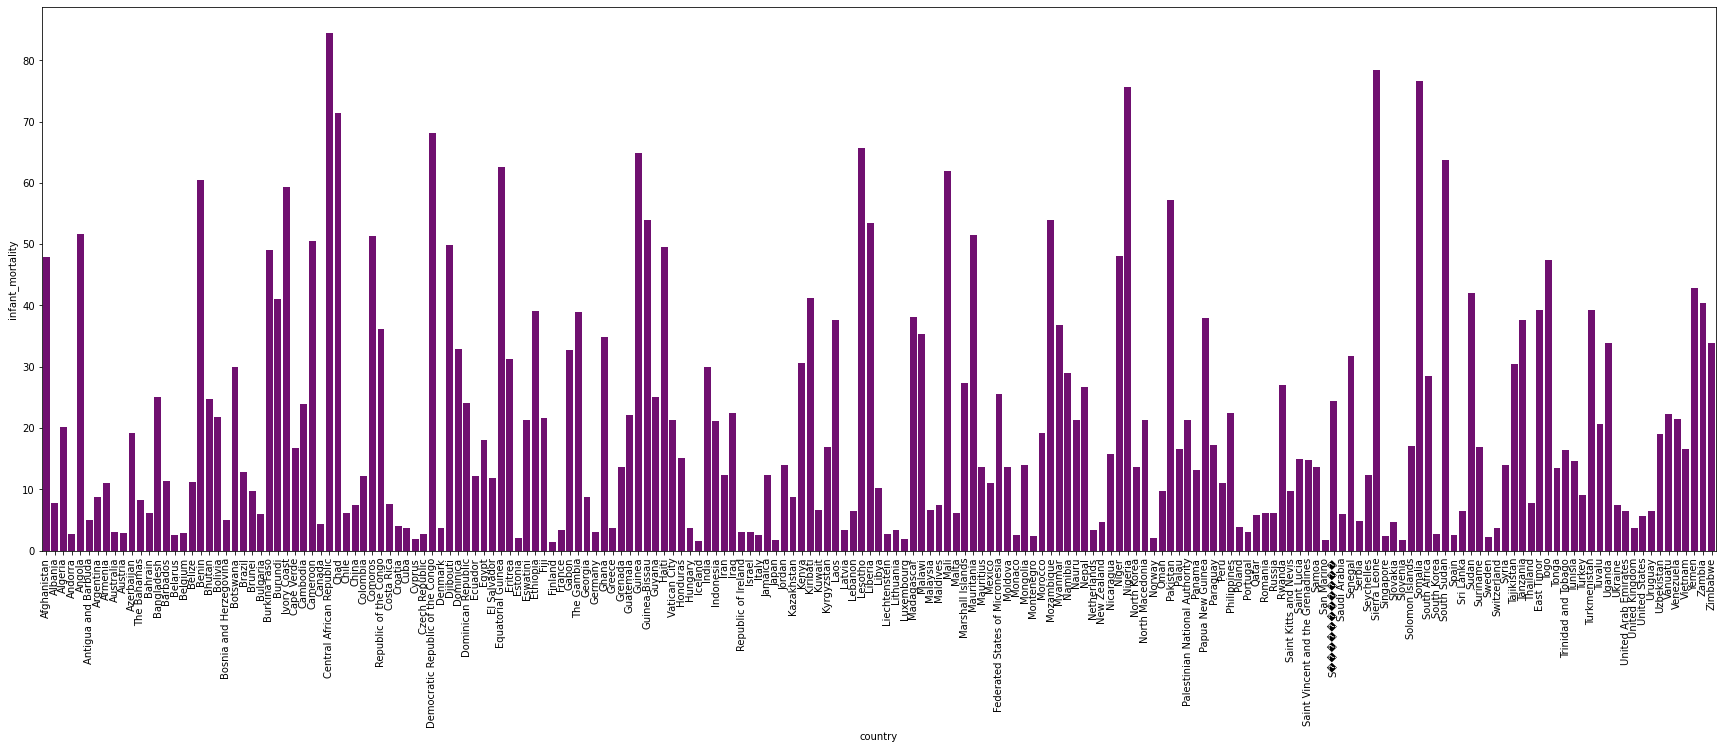

In [25]:
plt.figure(figsize=(30, 10))
sns.barplot(x = 'country', y = 'infant_mortality', data = df2, color = 'purple')
plt.xticks(rotation = 90);

ALTA : <60
MEDIA: MAYOR DE 30 Y MENOR DE 60
BAJA: MENOR DE 30

In [28]:
def categorizar_mortalidad(valor):
    if valor < 30:
        return 'baja'
    elif 30 <= valor < 60:
        return 'media'
    else:
        return 'alta'


In [31]:
df2.insert(2, 'categorizacion_', df2['infant_mortality'].apply(categorizar_mortalidad))

In [33]:
df2.drop(['categorizacion'], axis = 1, inplace = True)

In [34]:
df2

,country,infant_mortality,categorizacion_
0,Afghanistan,47.9,media
1,Albania,7.8,baja
2,Algeria,20.1,baja
3,Andorra,2.7,baja
4,Angola,51.6,media
...,...,...,...
190,Venezuela,21.4,baja
191,Vietnam,16.5,baja
192,Yemen,42.9,media
193,Zambia,40.4,media


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [35]:
from itertools import combinations

In [37]:
df[['fertility_rate', 'life_expectancy']].corr(method = 'spearman')

,fertility_rate,life_expectancy
fertility_rate,1.000000,-0.847145
life_expectancy,-0.847145,1.000000


<AxesSubplot:xlabel='fertility_rate', ylabel='life_expectancy'>

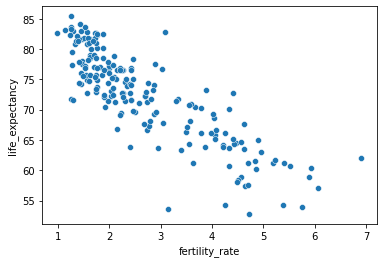

In [40]:
sns.scatterplot(x = 'fertility_rate', y= 'life_expectancy', data = df)

Es una correlación fuerte, pero negativa. A mayor esperanza de vida, menor tasa de natalidad. A mayor tasa de natalidad, menor esperanza de vida. 

6.Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

Text(0, 0.5, 'Frecuencia')

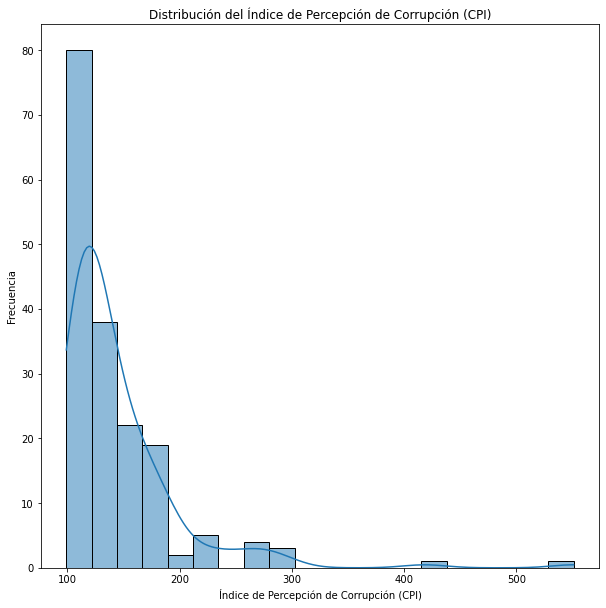

In [41]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='cpi', bins=20, kde=True)
plt.title('Distribución del Índice de Percepción de Corrupción (CPI)')
plt.xlabel('Índice de Percepción de Corrupción (CPI)')
plt.ylabel('Frecuencia')

7.Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [42]:
df['diferencia'] = df['gdp'] - df['co2-emissions']

# Encuentra el país con la mayor diferencia
pais_max_diferencia = df.loc[df['diferencia'].idxmax()]

print("País con la mayor diferencia entre GDP y CO2 emissions:")
print(pais_max_diferencia['country'])

País con la mayor diferencia entre GDP y CO2 emissions:
United States


8.Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'country', 'density',
       'abbreviation', 'agricultural_land(_%)', 'land_area',
       'armed_forces_size', 'calling_code', 'capital/major_city', 'cpi',
       'cpi_change_', 'currency-code', 'forested_area_', 'gasoline_price',
       'gdp', 'gross_primary_education_enrollment_',
       'gross_tertiary_education_enrollment_', 'largest_city', 'minimum_wage',
       'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation_', 'tax_revenue_',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitud',
       'longitud', 'continent', 'birth_rate', 'co2-emissions',
       'fertility_rate', 'infant_mortality', 'life_expectancy',
       'maternal_mortality_ratio'],
      dtype='object')

In [40]:
porcentaje_promedio = df["population_labor_force_participation_"].mean()
print(f"El porcentaje promedio de personas que participan en la fuerza laboral es: {porcentaje_promedio} %")

El porcentaje promedio de personas que participan en la fuerza laboral es: 62.73806818181817 %


9.Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas

In [20]:
from itertools import combinations

In [21]:
num = df.select_dtypes(include=np.number).columns
combinaciones = list(combinations(num,2))

In [22]:
def identificar_lineal (dataframe, lista_combinaciones):
    lineales = []
    no_lineales = []
    for tupla in lista_combinaciones:
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

    if p_value1 > 0.05 and p_value2 > 0.05:
        lineales.append(tupla)
    else:
        no_lineales.append(tupla)

    return lineales, no_lineales

# llamamos a la funcion
lineal, no_lineal = identificar_lineal (df, combinaciones)
print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('life_expectancy', 'maternal_mortality_ratio')]


In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

df_correlaciones = numeric_df.corr(method='spearman')


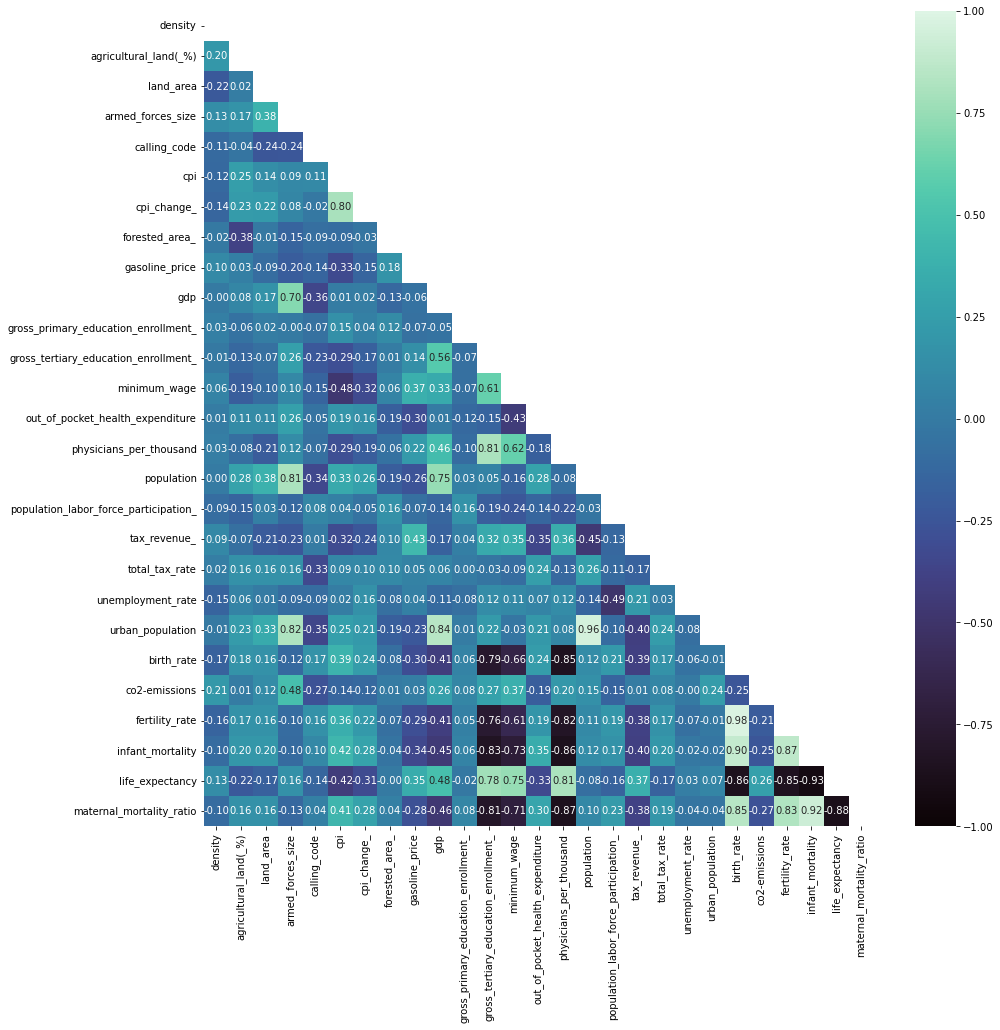

In [24]:
plt.figure(figsize = (15, 15))
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

sns.heatmap(df_correlaciones, 
            annot = True,
            fmt = ".2f",
            cmap = "mako",
            vmax = 1,
            vmin = -1,
            mask = mask);

In [42]:
df.to_csv('world_data_notnull.csv')